Assignment 1

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

TASK 1

Insertion Sort

In [5]:
def insertion_sort(arr):
    steps = 0
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key: # Shift larger elements right
            arr[j + 1] = arr[j]
            j -= 1
            steps += 1
        arr[j + 1] = key # Insert the element
        steps += 1
    return steps # Return number of steps

Merge Sort

In [6]:
def merge_sort(arr, steps=0):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]
        steps += merge_sort(left_half) # Recursively sort left half
        steps += merge_sort(right_half) # Recursively sort right half
        
        i = j = k = 0
        while i < len(left_half) and j < len(right_half): # Merge sorted halves
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1
            steps += 1
        while i < len(left_half): # Copy remaining elements from left half
            arr[k] = left_half[i]
            i += 1
            k += 1
            steps += 1
        while j < len(right_half): # Copy remaining elements from right half
            arr[k] = right_half[j]
            j += 1
            k += 1
            steps += 1
    return steps # Return number of steps

Heap Sort

In [7]:
def heapify(arr, n, i, steps=0):
    largest = i  
    left = 2 * i + 1  
    right = 2 * i + 2 
    if left < n and arr[left] > arr[largest]:
        largest = left
        steps += 1
    if right < n and arr[right] > arr[largest]:
        largest = right
        steps += 1
    if largest != i: # Swap and heapify again  
        arr[i], arr[largest] = arr[largest], arr[i]
        steps += 1
        steps += heapify(arr, n, largest)
    return steps

def heap_sort(arr):
    n = len(arr)
    steps = 0
    # Build a max heap
    for i in range(n // 2 - 1, -1, -1):
        steps += heapify(arr, n, i)
    # Extract elements one by one
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # Swap root with last element 
        steps += 1
        steps += heapify(arr, i, 0) # Re-heapify the reduced heap  
    return steps # Return number of steps

Quicksort

In [8]:
def quick_sort(arr, low, high, steps=0):
    if low < high:
        pi, step_partition = partition(arr, low, high) # Partition the array
        steps += step_partition
        steps += quick_sort(arr, low, pi - 1) # Recursively sort left part
        steps += quick_sort(arr, pi + 1, high) # Recursively sort right part
    return steps # Return number of steps

def partition(arr, low, high):
    pivot = arr[high] # Select pivot (last element)
    i = low - 1
    steps = 0
    for j in range(low, high):
        if arr[j] < pivot: # Place smaller elements before pivot
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
            steps += 1
    arr[i + 1], arr[high] = arr[high], arr[i + 1] # Swap pivot into position
    steps += 1
    return i + 1, steps # Return partition index and steps

Analysis

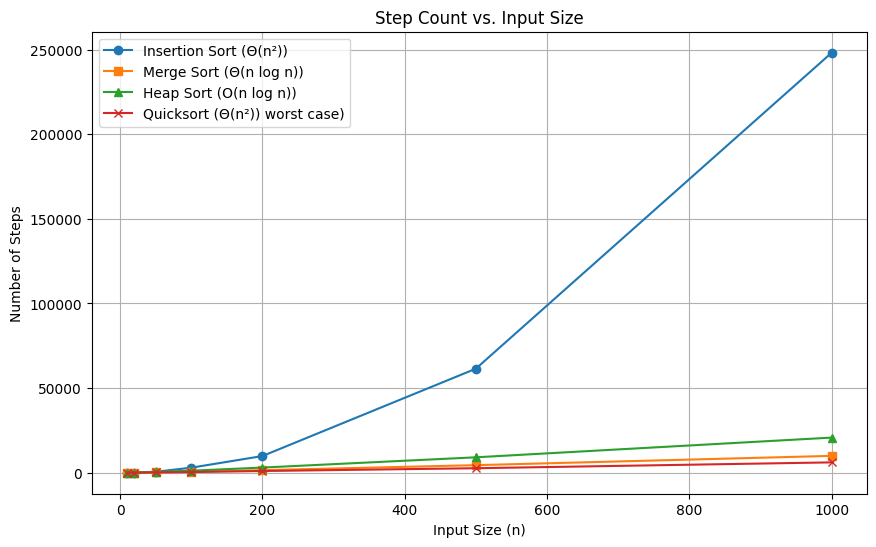

In [9]:
sizes = [10, 20, 50, 100, 200, 500, 1000]
insertion_steps = []
merge_steps = []
heap_steps = []
quick_steps = []

for n in sizes:
    arr = np.random.randint(0, 1000, n)
    insertion_steps.append(insertion_sort(arr.copy()))
    merge_steps.append(merge_sort(arr.copy()))
    heap_steps.append(heap_sort(arr.copy()))
    quick_steps.append(quick_sort(arr.copy(), 0, n-1))

plt.figure(figsize=(10, 6))
plt.plot(sizes, insertion_steps, label='Insertion Sort (Θ(n²))', marker='o')
plt.plot(sizes, merge_steps, label='Merge Sort (Θ(n log n))', marker='s')
plt.plot(sizes, heap_steps, label='Heap Sort (O(n log n))', marker='^')
plt.plot(sizes, quick_steps, label='Quicksort (Θ(n²)) worst case)', marker='x')
plt.xlabel('Input Size (n)')
plt.ylabel('Number of Steps')
plt.title('Step Count vs. Input Size')
plt.legend()
plt.grid()
plt.show()

TASK 2

Python

Size: 1000
QuickSort (size=1000): 3.324668 ms
InsertionSort (size=1000): 54.336866 ms
HeapSort (size=1000): 3.317515 ms
MergeSort (size=1000): 3.656785 ms
Size: 2500
QuickSort (size=2500): 4.654646 ms
InsertionSort (size=2500): 279.970646 ms
HeapSort (size=2500): 12.648185 ms
MergeSort (size=2500): 7.667224 ms
Size: 5000
QuickSort (size=5000): 12.642940 ms
InsertionSort (size=5000): 1108.034372 ms
HeapSort (size=5000): 28.842052 ms
MergeSort (size=5000): 27.260462 ms
Size: 7500
QuickSort (size=7500): 14.295101 ms
InsertionSort (size=7500): 2394.971371 ms
HeapSort (size=7500): 36.993345 ms
MergeSort (size=7500): 26.064793 ms
Size: 10000
QuickSort (size=10000): 22.115072 ms
InsertionSort (size=10000): 4375.860612 ms
HeapSort (size=10000): 52.337249 ms
MergeSort (size=10000): 37.713130 ms


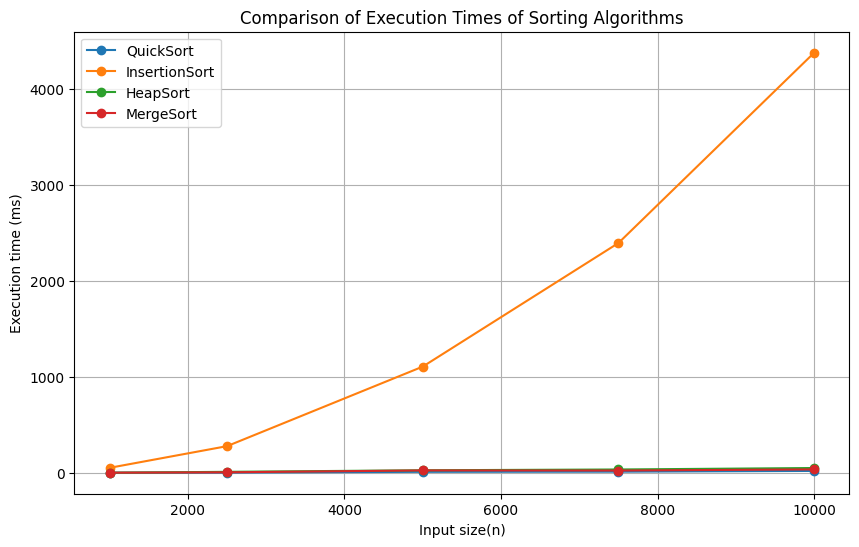

In [22]:
def measure_time(sort_function, arr, iterations=3):
    total_time = 0
    for _ in range(iterations):
        arr_copy = arr[:]
        start_time = time.time()
        sort_function(arr_copy)
        end_time = time.time()
        total_time += (end_time - start_time)
    return (total_time / iterations) * 1000

def generate_random_array(size):
    return [random.randint(0, 10000) for _ in range(size)]

sizes = [1000, 2500, 5000, 7500, 10000]  
times_quick = []
times_insertion = []
times_heap = []
times_merge = []

for size in sizes:
    arr = generate_random_array(size)
    print("Size:",size)
    
    # Quicksort time
    quick_time = measure_time(lambda a: quick_sort(a, 0, len(a) - 1), arr)
    times_quick.append(quick_time)
    print(f"QuickSort (size={size}): {quick_time:.6f} ms")
    
    # Insertion time
    insertion_time = measure_time(insertion_sort, arr)
    times_insertion.append(insertion_time)
    print(f"InsertionSort (size={size}): {insertion_time:.6f} ms")
    
    # Heapsort time
    heap_time = measure_time(heap_sort, arr)
    times_heap.append(heap_time)
    print(f"HeapSort (size={size}): {heap_time:.6f} ms")
    
    # Mergesort time
    merge_time = measure_time(merge_sort, arr)
    times_merge.append(merge_time)
    print(f"MergeSort (size={size}): {merge_time:.6f} ms")

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sizes, times_quick, label="QuickSort", marker='o')
plt.plot(sizes, times_insertion, label="InsertionSort", marker='o')
plt.plot(sizes, times_heap, label="HeapSort", marker='o')
plt.plot(sizes, times_merge, label="MergeSort", marker='o')

plt.xlabel('Input size(n)')
plt.ylabel('Execution time (ms)')
plt.title('Comparison of Execution Times of Sorting Algorithms')
plt.legend()
plt.grid(True)
plt.show()